# Project 1

#### Data Collection and Cleaning

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")

/opt/miniconda3/envs/DS5030/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/22/tmh4hgv57j97065jqsnx1qm40000gp/T/ipykernel_82455/2809093686.py:5: DtypeWarning: Columns (2,3,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")


In [5]:
rock = df.query("rock_genre == 'classic rock'")
rock

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
465,466,<verse_1> G C G C <chorus_1> C/D G Dmin C C/D ...,1963,'british blues' 'british invasion' 'classic ro...,1960.0,classic rock,artist_293,jazz,3f6KsfF6num3gcWlVAUDY2,5670CyWrIOA7702gNjsGMZ
478,479,<verse_1> Gmin D F C Cmin Bb A7 D7 <verse_2> G...,1994-01-01,'british blues' 'british invasion' 'classic ro...,1990.0,classic rock,artist_293,jazz,779vozNXnMDlOVIkga6rIe,5670CyWrIOA7702gNjsGMZ
9067,9068,<intro_1> G E7 Amin D7 G E7 Amin D7 <verse_1> ...,2012-01-01,'classic rock' 'mellow gold' 'rock',2010.0,classic rock,artist_5310,rock,5XcVPg8yyACsI28cS9sbxp,4STHEaNw4mPZ2tzheohgXB
10335,10336,<intro_1> G G/A G/B G/C D G G/A G/B G/C D G G/...,NaN,'classic rock' 'mellow gold' 'rock',NaN,classic rock,artist_5310,rock,NaN,4STHEaNw4mPZ2tzheohgXB
10922,10923,<intro_1> E A E <verse_1> B E B A B <chorus_1>...,2010-10-05,'classic rock' 'rock',2000.0,classic rock,artist_6138,rock,2ijHRr643f31GnagPYgcdE,4x1nvY2FN8jxqAFA0DA02H
...,...,...,...,...,...,...,...,...,...,...
634007,634008,<intro_1> G A E <verse_1> B G A E C G A <choru...,2021-04-16,'classic rock' 'mellow gold' 'rock',2020.0,classic rock,artist_5310,rock,4ByvgSH9KPxMQqqXFR9797,4STHEaNw4mPZ2tzheohgXB
634089,634090,<intro_1> A D A <verse_1> G Fs F E Ds D E A D ...,2020-12-18,'classic rock' 'mellow gold' 'rock',2010.0,classic rock,artist_5310,rock,6hOvsDkEEo0hvYDPt7Tpu8,4STHEaNw4mPZ2tzheohgXB
634096,634097,<instrumental_1> Fsmin Dmin Fsmin Dmin Fsmin D...,2020-12-18,'classic rock' 'mellow gold' 'rock',2010.0,classic rock,artist_5310,rock,3z5OdBycnAWmwACAhF1phF,4STHEaNw4mPZ2tzheohgXB
634097,634098,<intro_1> Amin <verse_1> D F A D F Amin <choru...,2020-12-18,'classic rock' 'mellow gold' 'rock',2010.0,classic rock,artist_5310,rock,18kdKpv7ZuLGoAy9tmcWi9,4STHEaNw4mPZ2tzheohgXB


In [6]:
import re

songs = rock["chords"]

#remove any <verse>/<chorus> tags from the chord data
cleaned_songs = [re.sub(r'<[^>]+>', '', song).strip() for song in songs]
#collapse multiple spaces into one
cleaned_songs = [' '.join(song.split()) for song in cleaned_songs]

#convert from string of chords to list where each index is chord
songs = [song.split() for song in cleaned_songs]
songs[0]


['G',
 'C',
 'G',
 'C',
 'C/D',
 'G',
 'Dmin',
 'C',
 'C/D',
 'D',
 'G',
 'C',
 'G',
 'C',
 'C/D',
 'G',
 'Dmin',
 'C',
 'C/D',
 'D',
 'G',
 'C',
 'G',
 'C',
 'C/D',
 'G',
 'Dmin',
 'C',
 'C/D',
 'D',
 'G',
 'C',
 'G',
 'C',
 'C/D',
 'G',
 'Dmin',
 'C',
 'C/D',
 'D',
 'G',
 'C',
 'G7',
 'C',
 'G7',
 'C',
 'G7',
 'C',
 'C/D',
 'G',
 'Dmin',
 'C',
 'C/D',
 'D',
 'G',
 'G7',
 'C',
 'G7',
 'C',
 'G7',
 'C',
 'G7',
 'C']

#### State Space

In [7]:
states = set()
for song in songs:
  new_states = set(song)
  states = states.union(new_states)

states = list(states)
len(states)

334

Across the 357 classic rock songs we are using to construct our Markov transition model, there are a total of 334 unique chords in our state space.

#### Tranistion matrix

In [8]:
S = len(states)

# Initialize transition count matrix
tr_counts = np.zeros((S, S))

# Count transitions across all trajectories
for song in songs:
    for t in range(1, len(song)):
        prev_state = song[t-1]
        curr_state = song[t]
        i = states.index(prev_state)
        j = states.index(curr_state)
        tr_counts[j, i] += 1

# Compute total outgoing transitions per state
sums = tr_counts.sum(axis=0, keepdims=True)

# Normalize to get transition probabilities (columns sum to 1)
tr_pr = np.divide(
    tr_counts, 
    sums, 
    out=np.zeros_like(tr_counts), 
    where=sums != 0
)

# Convert to DataFrame for readability
TM = pd.DataFrame(np.round(tr_pr, 3), index=states, columns=states)

print("Transition Proportions")
TM

Transition Proportions


,A/Fs,Esus4,Fs7,Bbadd9/C,Dno3d/F,Fmin11,Fsadd13,Amaj7/E,Gminadd13,Gminadd9,...,Bminadd13,Db,Emin/D,Fmaj9,D7/C,Eb/D,Fsmin/B,Gbmaj7,Emin7/Bb,Gsdim7
A/Fs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Esus4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fs7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bbadd9/C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dno3d/F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eb/D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fsmin/B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gbmaj7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Emin7/Bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


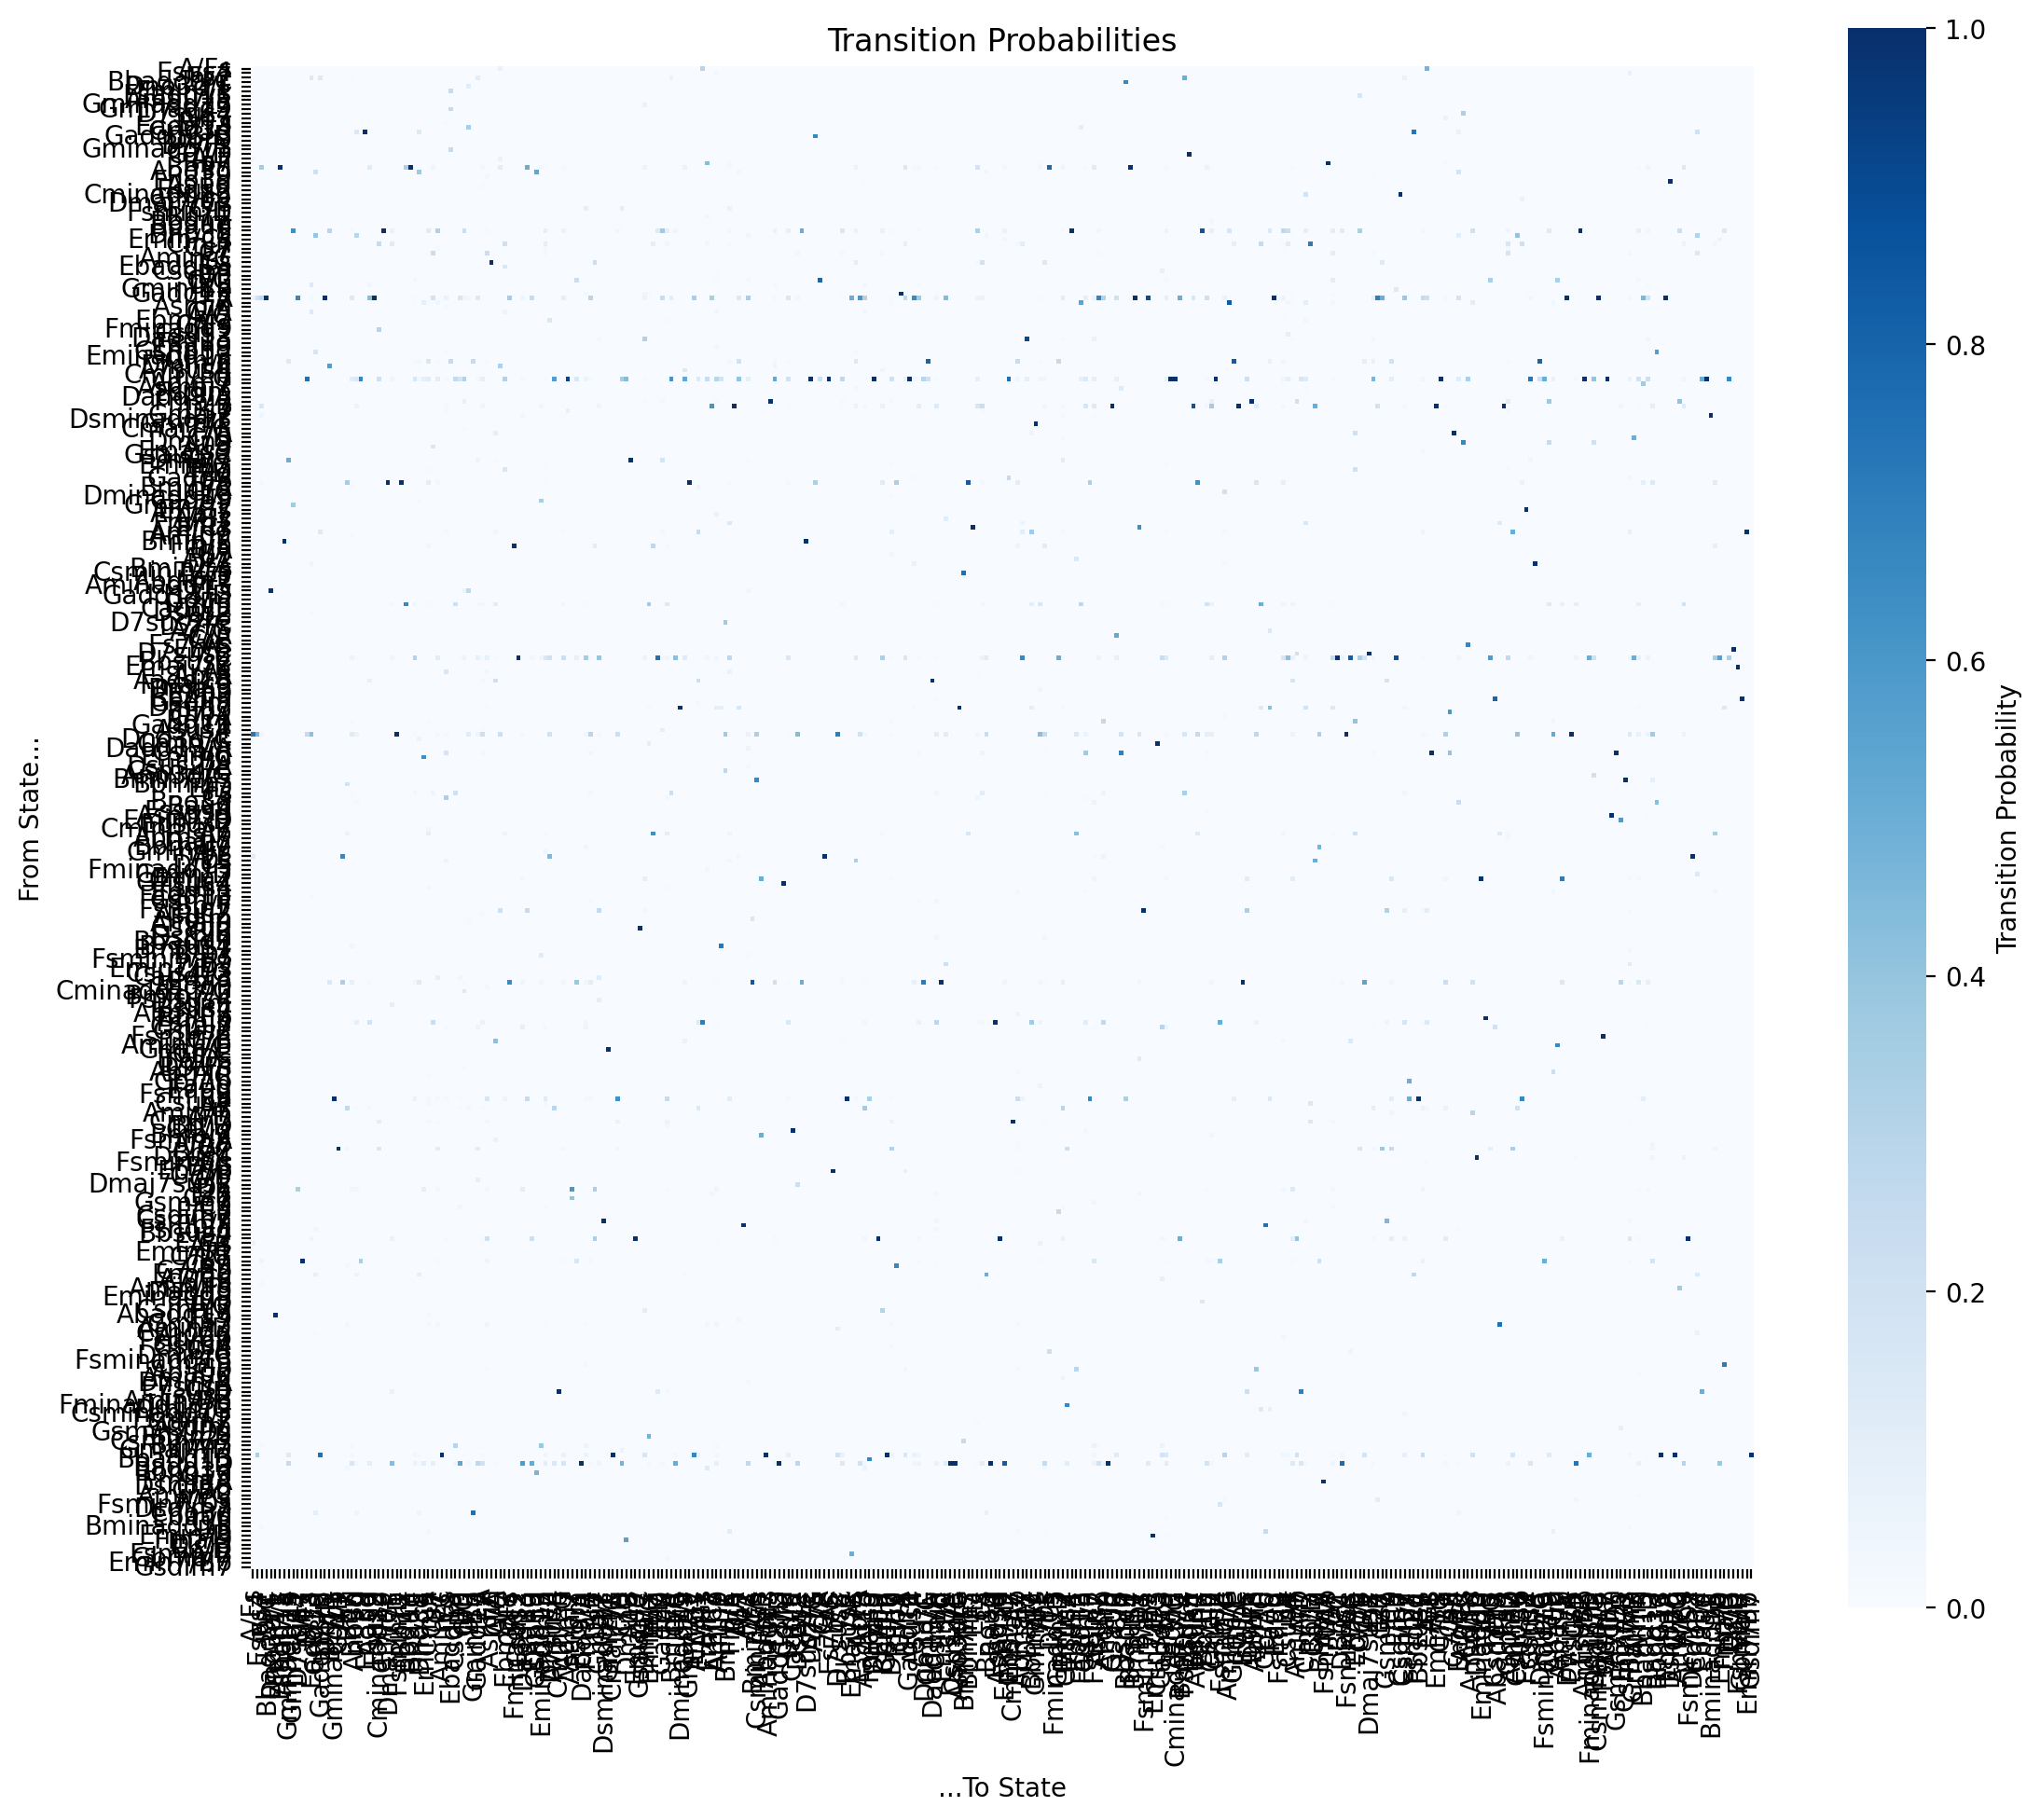

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(13, 11))
sns.heatmap(tr_pr, 
            cmap='Blues',
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.show()

#### Random Chord Generator

In [10]:
# Function to clean chord names so they are recognized by music21
def clean_chords(chords):
    cleaned = []
    for chord_symbol in chords:
        # Replace 'smin' with '#min'
        chord_symbol = chord_symbol.replace('smin', '#min')
        # Replace 'no3d' with '5'
        chord_symbol = chord_symbol.replace('no3d', '5')
        cleaned.append(chord_symbol)
    return cleaned

In [ ]:
from music21 import harmony

MANUAL_MAPPINGS = {
    'Cminmaj7': 'CmM7',
    'Fsminmaj7': 'F#mM7',
}

def normalize_chord_string(chord_str: str) -> str:
    """
    Cleans up chord names to match what music21 expects.  
    Args:
        chord_str: A string containing a chord name
    Returns:
        A string containing a normalized chord name
    """
    original_str = chord_str.strip()
    
    #Check if this chord has a manual change
    if original_str in MANUAL_MAPPINGS:
        return MANUAL_MAPPINGS[original_str]
    normalized = original_str
    
    #Convert flat notes
    normalized = normalized.replace('Bb', 'B-')
    normalized = normalized.replace('Eb', 'E-')
    normalized = normalized.replace('Ab', 'A-')
    normalized = normalized.replace('Db', 'D-')
    normalized = normalized.replace('Gb', 'G-')
    
    #capitalize 'sus' terms so they don’t get changed in the next step.
    normalized = normalized.replace('sus4', 'SUS4')
    normalized = normalized.replace('sus2', 'SUS2')
    normalized = normalized.replace('sus', 'SUS')
    
    #sharp notation
    normalized = normalized.replace('s', '#')
    
    normalized = normalized.replace('maj#9', 'M#9')
    normalized = normalized.replace('maj7', 'M7')
    normalized = normalized.replace('maj9', 'M9')
    normalized = normalized.replace('min', 'm')
    normalized = normalized.replace('no3d', '5')

    #'7sus2' convert to '7add(sus2)'
    normalized = normalized.replace('7SUS2', '7add(sus2)')
    normalized = normalized.replace('M7SUS2', 'M7add(sus2)')
    
    #lowercase for suspended chords
    normalized = normalized.replace('SUS4', 'sus4')
    normalized = normalized.replace('SUS2', 'sus2')
    normalized = normalized.replace('SUS', 'sus')
    
    return normalized

### Checker for the chords to parse with Music21

In [ ]:
successful_maps = {}
failed_maps = {}
for original_str in states:
    normalized_str = normalize_chord_string(original_str)
    try:
        # Try to parse the normalized chord using music21
        c = harmony.ChordSymbol(normalized_str)
        standardized_figure = c.figure
        successful_maps[original_str] = {
            'normalized': normalized_str,
            'music21_figure': standardized_figure,
        }          
    except Exception as e:
        failed_maps[original_str] = {
            'normalized': normalized_str,
            'error': str(e)
        }
print(failed_maps)

{}


In [15]:
states = [normalize_chord_string(s) for s in states]

In [16]:
import music21

## Random chords:
np.random.seed(100) 
initial_state = np.random.choice(states) # Choose an initial state at random
state_index = states.index(initial_state) # Get the index of the initial state
print(f'Initial state: {initial_state}') 

n_sim = 20

simulation = [initial_state]
for t in range(n_sim-1): 
    pr_t = tr_pr[:,state_index] # Transition probabilities at this state
    state_index = np.random.choice(len(states), p=pr_t) # Choose new state index
    simulation.append(states[state_index]) # Append new state to simulation

new_chorale = [state.split()[-1] for state in simulation] # Convert to chords

new_chorale = clean_chords(new_chorale)

print(new_chorale)

# New random chorale
stream = music21.stream.Stream()
for chord_symbol in new_chorale:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)  
    stream.append(chord)
stream.write('midi', fp='music.mid')
stream.show('midi')  

Initial state: Gmadd13
['Gmadd13', 'Am', 'Dm', 'C', 'F', 'G', 'A', 'B', 'E', 'E7', 'D9', 'D', 'G', 'C', 'B7/F#', 'Dm/F', 'A/E', 'Dm', 'F', 'Dm']
